Advanced Analytics: 

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing  import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

missing_values = ["n/a", "na", "NaN", "--"]
df = pd.read_csv('train.csv', na_values = missing_values)

splitsen test en train data

In [51]:
#SPLITSEN VAN TRAIN EN TEST SET

train=df.sample(frac=0.8,random_state=200) #random state is a seed value
test=df.drop(train.index)

xTest=train[["min_price", "max_price"]]
xTrain=train.drop(['min_price', 'max_price'], axis=1)

yTest = test[["min_price", "max_price"]]
yTrain = test.drop(['min_price', 'max_price'], axis=1)
yTrain.to_csv("testy.csv")

Preprocessing

In [52]:
# OVERVIEW OF NaN Values + MEAN 
   
xTrainMean = xTrain.mean(axis= 0, skipna=True)
xScreenSurfaceFrequent = xTrain['screen_surface'].mode().values[0]
xCPU_Details = xTrain['cpu_details'].mode().values[0]
xDetachable_Keyboard = xTrain['detachable_keyboard'].mode().values[0]
xGPU = xTrain['gpu'].mode().values[0]
xOS = xTrain['os'].mode().values[0]
xOS_Details = xTrain['os_details'].mode().values[0]

In [53]:
# EXTRA FUNCTIES DELETE NA
def ScreenSurfaceKuisen(row):
    if row['screen_surface']=='Glossy':
        return 'Glossy'
    if row['screen_surface']=='glossy':
        return 'Glossy'
    if row['screen_surface']=='Matte':
        return 'Matte'
    if row['screen_surface']=='matte':
        return 'Matte'
    return xScreenSurfaceFrequent

In [63]:
xTrain.head()

,id,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,cpu_details,detachable_keyboard,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight
267,24017,ASUS ZenBook Flip 14 UX461UN-DS74T Notebook (W...,Asus,Asus ZenBook Flip UX461UN,14.0,1920,1080,Glossy,1,Intel Core i7,Intel Core i7-8550U 1.8 GHz (8th gen Kaby Lake...,0.0,1,NVIDIA GeForce MX150,Windows,Windows 10 Home,16,512,512,3.30
13,28331,Newest HP 14-inch Chromebook HD Touchscreen La...,HP,HP Chromebook,14.0,1366,768,Glossy,1,Intel Celeron,Intel Celeron N3350 1.1 GHz (Apollo Lake Dual-...,0.0,0,Intel HD 500,Chrome OS,Chrome OS,4,32,32,3.40
22,30991,"MSI GF63 Thin 9SC-066 15.6"" Gaming Laptop, Thi...",MSI,MSI GF63 Thin 9SC,15.6,1920,1080,Matte,0,Intel Core i7,Intel Core i7-9750H 2.6 GHz (9th gen Coffee La...,0.0,1,NVIDIA GeForce GTX 1650,Windows,Windows 10 Home,16,512,512,4.10
240,17469,Asus VivoBook Flip Convertible 15.6â€ Touchsc...,Asus,Asus VivoBook Flip (TP501UAM-YS32T),15.6,1366,768,Glossy,1,Intel Core i3,Intel Core i3-6100U 2.3 GHz (6th gen Skylake D...,0.0,0,Intel HD 520,Windows,Windows 10,4,128,128,4.85
221,17751,HP 17.3 inch HD+ Flagship High Performance Lap...,HP,HP 17,17.3,1600,900,Glossy,0,Intel Core i7,Intel Core i7-7500U 2.7 GHz (7th gen Kaby Lake...,0.0,0,Intel HD 620,Windows,Windows 10,8,0,1000,5.84


In [59]:
#CLEAN alle NaN values
def deleteNa(dataframe):
    #NAAM IS NIET BELANGRIJK
    dataframe = dataframe.drop('name',axis =1)
    #Pixels_x
    dataframe['pixels_x'] = dataframe['pixels_x'].fillna(xTrainMean['pixels_x'])
    #Pixels_y
    dataframe['pixels_y'] = dataframe['pixels_y'].fillna(xTrainMean['pixels_y']) 
    #WEIGHT AANPASSEN
    dataframe['weight'] = dataframe['weight'].replace(0, np.NaN)
    dataframe['weight'] = dataframe['weight'].fillna(xTrainMean['weight'])    
    #Sceen_surface
    dataframe['screen_surface']=dataframe.apply(ScreenSurfaceKuisen,axis=1)
    #CPU details
    dataframe['cpu_details']=dataframe['cpu_details'].fillna(xCPU_Details)
    #detachable_keyboard
    dataframe['detachable_keyboard']=dataframe['detachable_keyboard'].fillna(xDetachable_Keyboard)
    #GPU
    dataframe['gpu']= dataframe['gpu'].fillna(xGPU)
    #OS
    dataframe['os']= dataframe['os'].fillna(xOS)
    #OS_details
    dataframe['os_details']= dataframe['os_details'].fillna(xOS_Details)
    return dataframe

In [64]:
xTrainClean = deleteNa(xTrain)
yTrainClean = deleteNa(yTrain)

 Encoden en herschalen

In [66]:
#LABEL BINARIZER WITH XTRAIN
  
xLBbrand = LabelBinarizer()
xLBbrand = xLBbrand.fit(xTrainClean['brand'])

xScaleScreen_Size = MinMaxScaler()
xScaleScreen_Size = xScaleScreen_Size.fit(xTrainClean['screen_size'].values.reshape(
-1,1))

xLBScreen_Surface = LabelBinarizer()
xLBScreen_Surface = xLBScreen_Surface.fit(xTrainClean['screen_surface'])

xLBTouchscreen = LabelBinarizer()
xLBTouchscreen = xLBTouchscreen.fit(xTrainClean['touchscreen'])

xLBCPU = LabelBinarizer()
xLBCPU = xLBCPU.fit(xTrainClean['cpu'])

xLBCpu_details = LabelBinarizer()
xLBCpu_details = xLBCpu_details.fit(xTrainClean['cpu_details'])

xLBGPU = LabelBinarizer()
xLBGPU = xLBGPU.fit(xTrainClean['gpu'])

xLBOS = LabelBinarizer()
xLBOS = xLBOS.fit(xTrainClean['os'])

xLBOS_Details = LabelBinarizer()
xLBOS_Details = xLBOS_Details.fit(xTrainClean['os_details'])

xScaleRam = MinMaxScaler()
xScaleRam = xScaleRam.fit(xTrainClean['ram'].values.reshape(-1,1))

xScalePixels_x = MinMaxScaler()
xScalePixels_x = xScalePixels_x.fit(xTrainClean['pixels_x'].values.reshape(-1,1))

xScalePixels_y = MinMaxScaler()
xScalePixels_y = xScalePixels_y.fit(xTrainClean['pixels_y'].values.reshape(-1,1))

xScaleSSD = MinMaxScaler()
xScaleSSD = xScaleSSD.fit(xTrainClean['ssd'].values.reshape(-1,1))

xScaleStorage = MinMaxScaler()
xScaleStorage = xScaleStorage.fit(xTrainClean['storage'].values.reshape(-1,1))

xScaleWeight = MinMaxScaler()
xScaleWeight = xScaleWeight.fit(xTrainClean['weight'].values.reshape(-1,1))


In [41]:
#EXTRA FUNCTIES BINARIZE
def lbBrand(row):
    brandLabel = [row['brand']]
    eBrand = xLBbrand.transform(brandLabel)
    return eBrand[0]

def scaleScreen_Size(row): 
    screen_size_data = np.array(row['screen_size']).reshape(1,-1)
    screen_size_normal = xScaleScreen_Size.transform(screen_size_data)
    return screen_size_normal[0][0]

def scalePixels_X(row): 
    pixel_x_data = np.array(row['pixels_x']).reshape(1,-1)
    pixel_x_normal = xScalePixels_x.transform(pixel_x_data)
    return pixel_x_normal[0][0]

def scalePixels_Y(row):
    pixel_y_data = np.array(row['pixels_y']).reshape(1,-1)
    pixel_y_normal = xScalePixels_y.transform(pixel_y_data)
    return pixel_y_normal[0][0]

def lbScreen_Surface(row):
    Screen_SurfaceLabel = [row['screen_surface']]
    eScreen_Surface = xLBScreen_Surface.transform(Screen_SurfaceLabel)
    return eScreen_Surface[0][0]

def lbTouchscreen(row):
    TouchscreenLabel = [row['touchscreen']]
    eTouchscreen = xLBTouchscreen.transform(TouchscreenLabel)
    return eTouchscreen[0][0]

def lbCPU(row):
    CPULabel = [row['cpu']]
    eCPU = xLBCPU.transform(CPULabel)
    return eCPU[0]

def lbCPU_details(row):
    CPU_DetailsLabel = [row['cpu_details']]
    eCPU_Details = xLBCPU.transform(CPU_DetailsLabel)
    return eCPU_Details[0]

def lbGPU(row):
    GPULabel = [row['gpu']]
    eGPU = xLBGPU.transform(GPULabel)
    return eGPU[0]

def lbOS(row):
    OSLabel = [row['os']]
    eOS = xLBOS.transform(OSLabel)
    return eOS[0]

def lbOS_Details(row):
    OS_DetailsLabel = [row['os_details']]
    eOS_Details = xLBOS_Details.transform(OS_DetailsLabel)
    return eOS_Details[0]

def scaleRam(row): 
    scale_Ram_data = np.array(row['ram']).reshape(1,-1)
    Ram_normal = xScaleRam.transform(scale_Ram_data)
    return Ram_normal[0][0]

def scaleSSD(row):
    scale_SSD_data =  np.array(row['ssd']).reshape(1,-1)
    SSD_normal = xScaleSSD.transform(scale_SSD_data)
    return SSD_normal[0][0]

def scaleStorage(row):
    scale_Storage_data =  np.array(row['storage']).reshape(1,-1)
    Storage_normal = xScaleStorage.transform(scale_Storage_data)
    return Storage_normal[0][0]

def scaleWeight(row):
    scale_Weight_data =  np.array(row['weight']).reshape(1,-1)
    Weight_normal = xScaleStorage.transform(scale_Weight_data)
    return Weight_normal[0][0]

In [42]:
# Binairize the categorical labels
def binarizeLabels(dataframe):
    dataframe['eBrand']=dataframe.apply(lbBrand,axis=1)
    dataframe=dataframe.drop('brand',axis=1)
    
    dataframe=dataframe.drop('base_name',axis=1)
    
    dataframe['eScreen_Size']=dataframe.apply(scaleScreen_Size,axis=1)
    dataframe=dataframe.drop('screen_size',axis=1)
    
    dataframe['ePixel_x']=dataframe.apply(scalePixels_X,axis=1)
    dataframe=dataframe.drop('pixels_x', axis=1)
 
    dataframe['ePixel_y']=dataframe.apply(scalePixels_Y,axis=1)
    dataframe=dataframe.drop('pixels_y', axis=1) 
    
    dataframe['eScreen_Surface']=dataframe.apply(lbScreen_Surface,axis=1)
    dataframe=dataframe.drop('screen_surface',axis=1)
    
    dataframe['eTouchscreen']=dataframe.apply(lbTouchscreen,axis=1)
    dataframe=dataframe.drop('touchscreen',axis=1)
    
    dataframe['eCPU']=dataframe.apply(lbCPU,axis=1)
    dataframe = dataframe.drop('cpu',axis=1)
    
    dataframe['eCPU_details']=dataframe.apply(lbCPU_details,axis=1)
    dataframe=dataframe.drop('cpu_details',axis=1)
    
    dataframe['eDetachable_Keyboard']=dataframe['detachable_keyboard'].copy()
    dataframe=dataframe.drop('detachable_keyboard',axis=1)
    
    dataframe['eDiscrete_Gpu']=dataframe['discrete_gpu'].copy()
    dataframe=dataframe.drop('discrete_gpu',axis=1)
    
    dataframe['eGPU']=dataframe.apply(lbGPU,axis=1)
    dataframe = dataframe.drop('gpu',axis=1)
    
    dataframe['eOS']=dataframe.apply(lbOS,axis=1)
    dataframe = dataframe.drop('os',axis=1)
    
    dataframe['eOS_Details']=dataframe.apply(lbOS_Details,axis=1)
    dataframe = dataframe.drop('os_details',axis=1)
    
    dataframe['eRam']=dataframe.apply(scaleRam,axis=1)
    dataframe = dataframe.drop('ram',axis=1)
    
    dataframe['eSSD']=dataframe.apply(scaleSSD,axis=1)
    dataframe = dataframe.drop('ssd',axis=1)
    
    dataframe['eStorage']=dataframe.apply(scaleStorage,axis=1)
    dataframe = dataframe.drop('storage',axis=1)
    
    dataframe['eWeight']=dataframe.apply(scaleWeight,axis=1)
    dataframe=dataframe.drop('weight',axis=1)
    return dataframe

xTrainEncoded = binarizeLabels(xTrainClean)
yTrainEncoded = binarizeLabels(yTrainClean)


In [43]:
#vectoren omzetten naar aparte kolommen
Vectoren = ["eBrand", "eCPU", "eCPU_details", "eGPU", "eOS", "eOS_Details"]

def convert_vec(frame):
    S_brand = pd.DataFrame(frame.eBrand.values.tolist(), index= frame.index)
    S_CPU = pd.DataFrame(frame.eCPU.values.tolist(), index= frame.index)
    S_CPU_details= pd.DataFrame(frame.eCPU_details.values.tolist(), index= frame.index)
    S_GPU= pd.DataFrame(frame.eGPU.values.tolist(), index= frame.index)
    S_OS= pd.DataFrame(frame.eOS.values.tolist(), index= frame.index)
    S_OS_details= pd.DataFrame(frame.eOS_Details.values.tolist(), index= frame.index)
    
    new=frame.drop(Vectoren, axis=1)
    
    frames = [new, S_brand, S_CPU, S_CPU_details, S_GPU, S_OS,S_OS_details]
    
    final = pd.concat(frames, axis=1)
    
    return final

Final_xtrain = convert_vec(xTrainEncoded)
Final_ytrain = convert_vec(yTrainEncoded)



In [79]:
#training two models

#Comparing random forests and the multi-output meta estimator (neem dan de beste)
max_depth = 32
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=1000,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(Final_xtrain, xTest )

regr_rf = RandomForestRegressor(n_estimators=1000, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(Final_xtrain, xTest)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=32,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [80]:
#Predict on test set
y_multirf = regr_multirf.predict(Final_ytrain)
y_rf = regr_rf.predict(Final_ytrain)

yTest_matrix = yTest.to_numpy()

summed_error=0
instances=len(yTest_matrix)
list = np.arange(instances)
for i in list :
    summed_error= summed_error + abs(yTest_matrix[i][0]-y_multirf[i][0])+ abs(yTest_matrix[i][1]-y_multirf[i][1])

Mean_summed_error= (1/instances)*summed_error

print(Mean_summed_error)
#MEAN SUMMED ABSOLUTE ERROR measure (= absolute error for min price + absolute error for max price, averaged over the instances)

338.7274330283221


C:\Users\Stijn\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


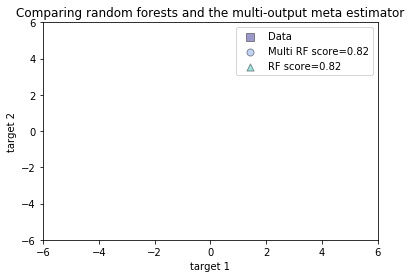

In [72]:
#Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(yTest_matrix[:, 0], yTest_matrix[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(Final_ytrain, yTest_matrix))
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(Final_ytrain, yTest_matrix))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()
#dataframe moet matrix zijn

In [73]:
#Predict on new data
df = pd.read_csv('test.csv', na_values = missing_values)
ID= df['id']

New_data_clean = deleteNa(df)
New_data_encoded = binarizeLabels(New_data_clean)
New_data_single = convert_vec(New_data_encoded)


In [74]:
#Prediction
New_data_multirf = regr_multirf.predict(New_data_single)
New_data_rf = regr_rf.predict(New_data_single)


New_data_rf = pd.DataFrame(New_data_rf, index= ID, columns= ["Min", "Max"] )

print(New_data_rf)
#prediction van random forest wegschrijven
New_data_rf.to_csv("Predictions.csv")


               Min          Max
id                             
28807  1133.109090  1187.868970
22559   391.632470   420.003210
28647   818.977170   834.100970
22141   526.247510   541.460440
26116  2224.389131  2397.680221
27111  1136.177150  1168.719558
23420   728.017340   751.394510
21464   166.287030   172.638510
29405   696.141690   729.152980
27107   359.001610   373.365790
26141   883.754670   899.920430
25928  1612.527228  1703.004408
24845   693.003403   750.119530
28804   318.057060   333.556020
26772   593.722530   599.664470
27413   979.026603  1014.201681
7261    720.655740   759.970260
31424  1009.738140  1034.999090
3940    402.109100   406.923050
16238   554.399970   563.314030
29407  1344.186251  1407.224700
24011   309.899680   331.499370
8542    432.933840   438.505240
14448   885.893470   893.725320
19611   212.498300   220.398790
30068  1036.723570  1074.196450
26802   300.029200   316.636090
26129  1761.533986  1822.063132
7080    587.866590   593.185910
23193   